# Wine quality prediction analysis

In [203]:
#Object is to predict quality of the wine based on it's features

### Data Set Information

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. 

These datasets can be viewed as classification or regression tasks but I we will be treating it as a classification task because it is better suited for accuracy. 

The classes are ordered and not balanced. Meaning that there are more normal wines than excellent and poor quality wines and they will have to be balanced to improve accuracy.

We are not sure if all input variables are relevant. The datasets were combined and only a limited amount of values were randomly removed.

Input variables (based on physicochemical tests): all the features are based as numerical values which will allow us to perform various statistical operation to extract info from the features
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

# Import modules


In [204]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [205]:
# !pip install imbalanced-learn

!pip install imblearn




# loading the dataset


In [206]:
#remember to use raw string to treat backslashes as literal characters
df = pd.read_csv(r"C:\Users\franc\OneDrive\Documents\Data Engineering\Capstone 2\winequality.csv")
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [207]:
#statistical info
df.describe()
#you can deduce by looking at the count that there are missing values
#missing values can be filled using median, mode or mean values
#for numerical attributes it's best to use mean values, rolling mean value, average value

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [208]:
#datatype info
df.info()
#only one feature is an object while the rest are floats on the exception of the last feature Quality which is an Int and 
#in a particular range an problably a classifier

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


## Preprocessing the dataset

In [209]:
#check for null values
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [210]:
#you can use the mean values of the each particular column to fill in the missing values with a for loop
for col, value in df.items(): #got an error due to a string in one of the columns ('TYPE' is an object)
    if col !='type':
        df[col] = df[col].fillna(df[col].mean())

In [211]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Exploratory Data Analysis

Data Validation: Before deciding to remove an outlier, it's essential to validate its legitimacy. Review the data source and collection process to ensure the outlier is not due to data entry errors or measurement issues. If you determine that the outlier is genuine, you can proceed with outlier handling techniques.

Winsorization: Winsorization involves replacing extreme values with values that are less extreme but still within a reasonable range. You can either set the outliers to a predefined percentile (e.g., 5th and 95th percentiles) or replace them with a specific value (e.g., the maximum or minimum value within a certain range).

Trimming: Trimming involves removing a certain percentage of the highest and lowest values from the dataset. For example, you can choose to eliminate the top and bottom 5% or 1% of the data, effectively removing outliers from the analysis. Trimming is suitable when you have a large dataset and don't want outliers to heavily influence summary statistics or visualization.

Transformations: Sometimes, outliers can be a result of skewed data distributions. In such cases, applying mathematical transformations like logarithmic, square root, or inverse transformations can help normalize the data and reduce the impact of outliers.

Robust Statistics: Another option is to use statistical methods that are less sensitive to outliers. For instance, instead of calculating the mean, you can use the median as a measure of central tendency. Similarly, using robust measures of dispersion like the interquartile range (IQR) instead of standard deviation can provide a more robust estimate.

Separate Analysis: In certain situations, outliers may represent a distinct subgroup or special cases within your data. Instead of removing them, you can choose to perform separate analyses on the outliers and the remaining data to gain insights into their unique characteristics and understand potential underlying factors.

It's important to note that the decision to handle or remove outliers depends on the specific context of your analysis, the nature of the data, and the goals of your study. Always exercise caution and carefully consider the implications of removing outliers, as it may impact the integrity and representativeness of your data.

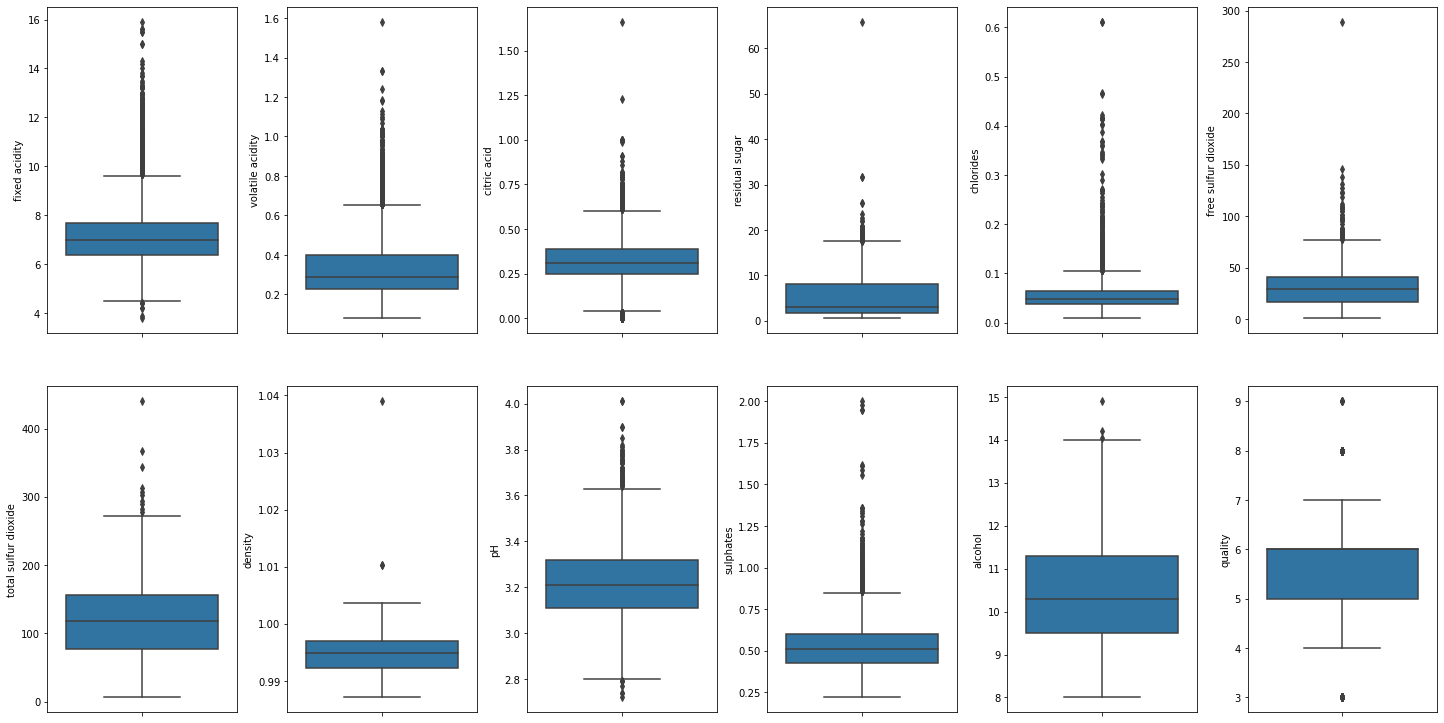

In [212]:
#create box plots to check for outliers and remove them if necessary
#I have 12 numerical features so go with 2 rows with 6 columns each
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in df.items():
    if col !=  "type":
        sns.boxplot(y=col, data=df, ax=ax[index]) #axis = axis of index
        index += 1 #to move to the next column
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

#plt.tight_layout(pad=.5, w_pad=.7, h_pad=5), adjusts the spacing between subplots to make them
#fit better within the figure and improve readability. 



## Handling outliers

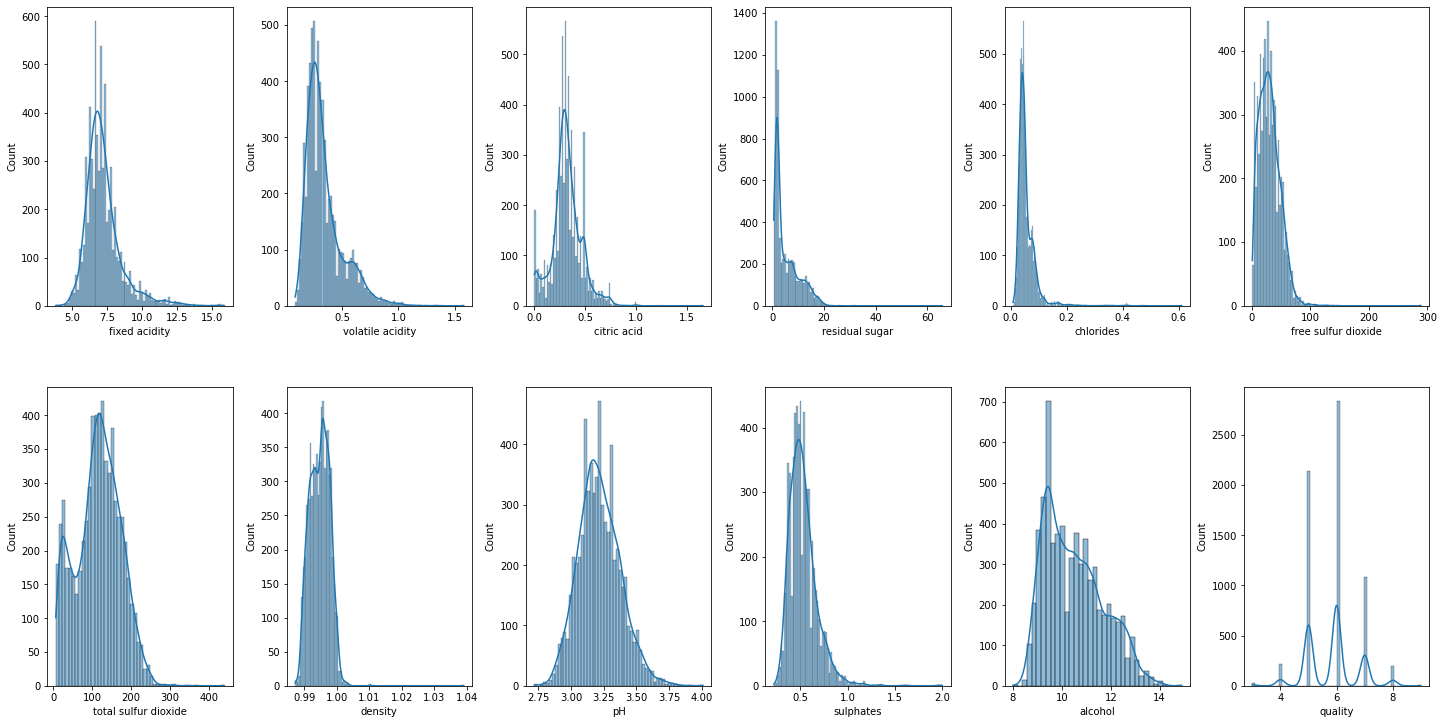

In [213]:
#  create a dist plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()
#Seaborn version 0.11.0, the distplot() function is deprecated and has been replaced by sns.histplot() 
#for creating histograms or distribution plots.

for col, value in df.items():
    if col != 'type':
        sns.histplot(data=value, ax=ax[index], kde=True)
        index += 1  # to move to the next column
#The data parameter is set to value, which represents the column data you are iterating over. 
#The kde=True parameter adds a kernel density estimate to the plot, which represents the smooth line of the distribution.
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)


In [214]:
#log transformation
df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide'])
#added +1 because log will not support 0

# df['free sulfur dioxide']: This retrieves the 'free sulfur dioxide' column from the DataFrame df. 

# np.log(1 + df['free sulfur dioxide']): This applies the natural logarithm (base e) to each value in the 
#'free sulfur dioxide' column, after adding 1 to each value. 
#The addition of 1 is commonly done before taking the logarithm to handle zero or negative values in the data. 
#This transformation is often used to reduce the skewness or compress the scale of skewed variables.

# df['free sulfur dioxide'] = np.log(1 + df['free sulfur dioxide']): 
#This assigns the log-transformed values back to the 'free sulfur dioxide' column in the DataFrame df, 
#overwriting the original values.


<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Count'>

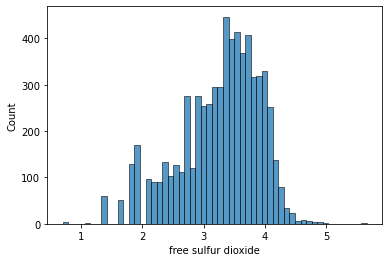

In [215]:
sns.histplot(df['free sulfur dioxide'])
#now it is in the uniform dist

<AxesSubplot:xlabel='type', ylabel='count'>

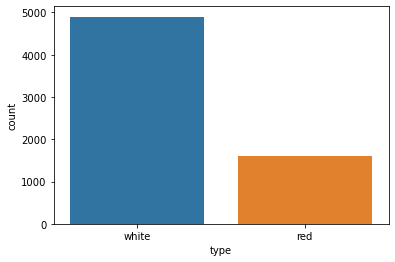

In [216]:
sns.countplot(data=df, x='type')
# plt.show()
#df['type'].dtype

## Classification

<AxesSubplot:xlabel='quality', ylabel='count'>

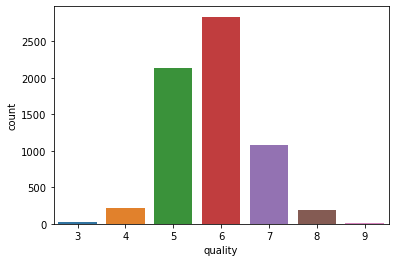

In [217]:
#for the classification segment we need to know the number of classes 
sns.countplot(data=df, x='quality')

# as previously mentioned the quality of the wine ranges from 0-9, but as the plot shows the quality in this data set 
# ranges from 3-9 and 5,6, 7 have a figher #of sample. This means that the model will be biased towards the classes 5-7
#this is called class inbalancement because all the class are in the front range of values

# so no we have to generalize the model for the 'test data  set prediction and balance the classes to make 
#the data set more uniform
#this is called class inbalancement because all the class are in the front range of values

In [218]:
#we will take care of the class inbalancement before splitting the dataset up

# Correlation Matrix

<AxesSubplot:>

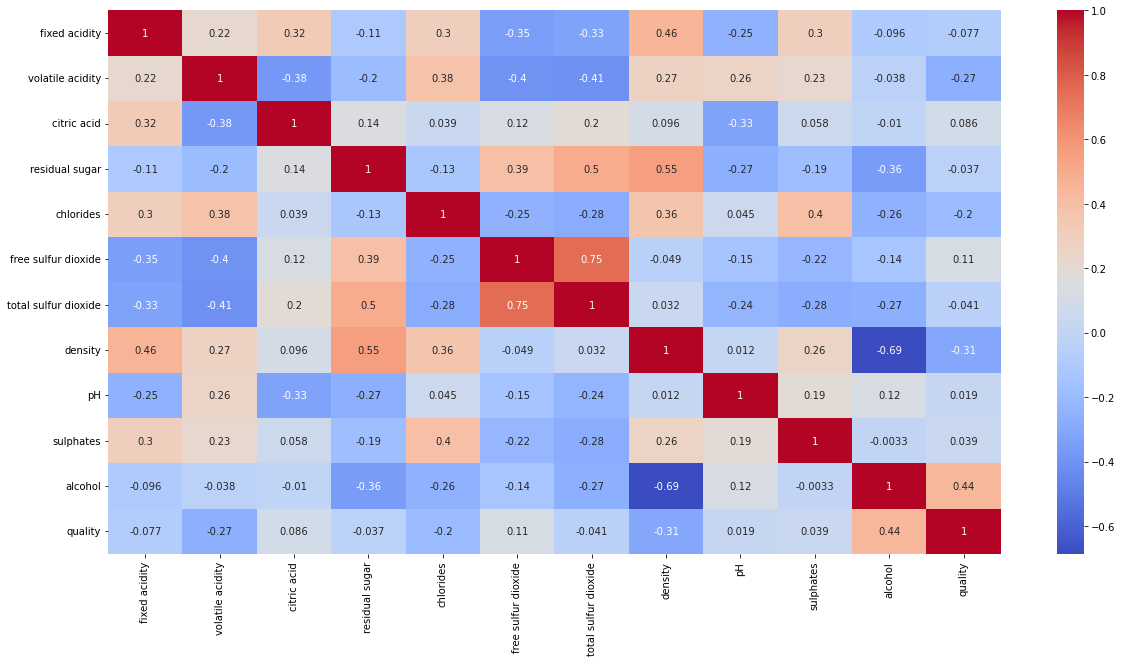

In [219]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# The annot=True parameter enables the display of correlation values inside each cell of the heatmap.
# The cmap='coolwarm' parameter sets the color map for the heatmap. In this case, it uses a cool-to-warm color palette.

# Input Split
        

In [243]:
# The value most correlated to our output variable (quality) is alcohol at .44 
# sulfur dioxide (free and total) are highly correlated (.75) to each other get rid of free sulphure dioxide and 
# density is highly negativly correlated -.69 alcohol so let's drop it as well
x=df.drop(columns=['type', 'quality', 'density', 'free sulfur dioxide'])
y= df['quality']

# Class Imbalancement

In [245]:
y.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [252]:
from imblearn.over_sampling import SMOTE
oversample =SMOTE(k_neighbors=4)
#Transfer the dataset
x,y = oversample.fit_resample(x,y)

In [253]:
y.value_counts()

6    2836
5    2836
7    2836
8    2836
4    2836
3    2836
9    2836
Name: quality, dtype: int64

# Model Training

In [254]:
#classify function for training
from sklearn.model_selection import cross_val_score, train_test_split
def classify(model, x, y):
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size =0.25, random_state=42)
    #train the model
    model.fit(x_train, y_train)
    print("accuracy:", model.score(x_test,y_test)*100)
    
    #cross-validation
    score =cross_val_score(model, x, y, cv=5)
    print("CV Score:", np.mean(score)*100)
    
    

In [255]:
from sklearn.linear_model import LogisticRegression
#this is a classification model not a regression model
model =  LogisticRegression()
classify(model, x, y) 

accuracy: 32.82288938142253
CV Score: 31.19060797837216


In [256]:
from sklearn.tree import DecisionTreeClassifier
model =DecisionTreeClassifier()
classify(model, x, y)

accuracy: 80.05238766874874
CV Score: 74.99000626075572


In [257]:
from sklearn.ensemble import ExtraTreesClassifier
model =ExtraTreesClassifier()
classify(model, x, y)

accuracy: 88.63590570219625
CV Score: 83.17558850786591


In [258]:
from sklearn.ensemble import RandomForestClassifier
model =RandomForestClassifier()
classify(model, x, y)

accuracy: 87.44710860366713
CV Score: 81.80043983870465


In [259]:
import lightgbm 
model = lightgbm.LGBMClassifier()
classify(model, x, y)

accuracy: 85.67398750755592
CV Score: 79.57919348526185
